In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

from Resnet import resnet101
from Icecube_Dataloader import IceCube_Dataloader, collate_fn

In [2]:
model = resnet101(pretrained = False)
model.fc = nn.Sequential(nn.ReLU(),nn.Linear(in_features=2048, out_features=2)) # Changed FC layer for our task
model.load_state_dict(torch.load("./model_101.pth", weights_only=True))
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [3]:
pqfile = '/home/washindeiru/primaryDrive/iceCube/icecube-neutrinos-in-deep-ice/train_meta.parquet'
path_batch = '/home/washindeiru/primaryDrive/iceCube/icecube-neutrinos-in-deep-ice/train/'

batch_num=2
lr = 1e-06
num_epochs = 1
batch_size = 8

In [4]:
from torch.utils.data import DataLoader

ice_dataset = IceCube_Dataloader(pqfile, path_batch, batch_num)
train_dataset = ice_dataset
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,collate_fn=collate_fn, num_workers=11)

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = model.to(device)

## Testy resnet101

In [6]:
data_iter = iter(train_dataloader)

In [7]:
first_batch = next(data_iter)
print(f"input tensor shape: {first_batch['input_tensor'].shape}")
print(f"label shape: {first_batch['label'].shape}")
input_tensor = first_batch['input_tensor']
label = first_batch['label'].to(device)

result = model(input_tensor.to(device))

input tensor shape: torch.Size([8, 3, 1, 4122])
label shape: torch.Size([8, 2])


In [8]:
def compare(label, result):
    assert label.shape == result.shape
    x = label.shape[0]
    for i in range(x):
        print(f"Correct: {label[i, :].detach().cpu().numpy()}, predicted: {result[i, :].detach().cpu().numpy()}")

In [9]:
compare(label, result)

Correct: [5.04719   1.3302962], predicted: [2.7375016 1.1648266]
Correct: [4.672079  2.5542676], predicted: [2.7430708 1.1848358]
Correct: [4.2313104 0.7490389], predicted: [2.7388897 1.1587621]
Correct: [0.3990309 1.0438093], predicted: [2.729124  1.1731495]
Correct: [0.6897707 1.5229326], predicted: [2.737986  1.1695565]
Correct: [1.4470869  0.88987654], predicted: [2.732805  1.1731212]
Correct: [3.7506695 2.204246 ], predicted: [3.042027  1.3497319]
Correct: [2.6134999 1.4089406], predicted: [2.8288493 1.2926705]


In [10]:
loss_function = nn.MSELoss().to(device)

In [11]:
temp = loss_function(result.float(),label.float())
print(temp)

tensor(1.6341, device='cuda:0', grad_fn=<MseLossBackward0>)


In [12]:
first_batch = next(data_iter)
print(f"input tensor shape: {first_batch['input_tensor'].shape}")
print(f"label shape: {first_batch['label'].shape}")
input_tensor = first_batch['input_tensor']
label = first_batch['label']

result = model(input_tensor.to(device))

input tensor shape: torch.Size([8, 3, 1, 23])
label shape: torch.Size([8, 2])


In [13]:
compare(label, result)

Correct: [6.0324473 1.5835192], predicted: [3.6672075 1.5898433]
Correct: [5.541214  2.2121196], predicted: [3.5822291 1.8325926]
Correct: [1.1983422  0.64190996], predicted: [3.9468298 1.8575295]
Correct: [1.685399 0.803144], predicted: [3.4310412 1.8248564]
Correct: [4.2982864 1.7478678], predicted: [3.6026232 1.7176795]
Correct: [6.157866   0.69473183], predicted: [3.3351939 1.9619198]
Correct: [2.1166492 1.2572986], predicted: [3.7109318 1.2514011]
Correct: [5.9072537 1.9450572], predicted: [3.6283038 1.9825152]


In [14]:
first_batch = next(data_iter)
print(f"input tensor shape: {first_batch['input_tensor'].shape}")
print(f"label shape: {first_batch['label'].shape}")
input_tensor = first_batch['input_tensor']
label = first_batch['label']

result = model(input_tensor.to(device))

input tensor shape: torch.Size([8, 3, 1, 71])
label shape: torch.Size([8, 2])


In [15]:
compare(label, result)

Correct: [0.40712506 1.1294547 ], predicted: [2.9937081 1.1618612]
Correct: [2.909838  0.7345467], predicted: [3.152316  1.4322631]
Correct: [2.8935375 1.8360618], predicted: [3.1033733 1.2073488]
Correct: [1.9000415 2.1662273], predicted: [2.8346393 1.2892548]
Correct: [5.194564  1.6340865], predicted: [2.989181  1.3537567]
Correct: [3.9560006 2.4278255], predicted: [2.8751938 1.1709932]
Correct: [4.7056003 2.1752298], predicted: [2.8317986 1.2207718]
Correct: [3.215443  0.8877253], predicted: [3.2471535 1.449516 ]


In [16]:
first_batch = next(data_iter)
print(f"input tensor shape: {first_batch['input_tensor'].shape}")
print(f"label shape: {first_batch['label'].shape}")
input_tensor = first_batch['input_tensor']
label = first_batch['label']

result = model(input_tensor.to(device))

input tensor shape: torch.Size([8, 3, 1, 261])
label shape: torch.Size([8, 2])


In [17]:
compare(label, result)

Correct: [6.0055165 1.3955877], predicted: [2.6770208 1.2130101]
Correct: [5.782661  1.7037708], predicted: [2.8563747 1.3351773]
Correct: [0.8338702 2.841327 ], predicted: [2.861361  1.3483549]
Correct: [5.582497  1.3299142], predicted: [2.7109418 1.3600739]
Correct: [6.126193   0.43740624], predicted: [2.951952  1.1863551]
Correct: [6.0151296 1.0584348], predicted: [2.9595284  0.81172174]
Correct: [6.033761  1.3008685], predicted: [2.6970482 1.3746084]
Correct: [0.98448044 1.3736529 ], predicted: [2.9777513 1.455776 ]


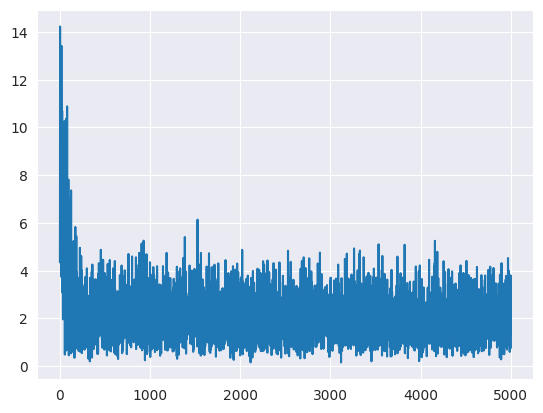

In [18]:
import pickle

with open('losses.pickle', 'rb') as f:
    data = pickle.load(f)

plt.figure()
plt.plot(data)

In [21]:
import numpy as np

losses_ = []
loss_total = 0.

for i in range(num_of_examples):
    example = next(data_iter)
    input_tensor = first_batch['input_tensor']
    label = first_batch['label']

    result = model(input_tensor.to(device))

    loss_value = loss_function(result.float().cpu(),label.float().cpu())
    losses_.append(loss_value.item())

print(f"average loss: {np.mean(losses_)}")
print(f"Median loss: {np.median(losses_)} ")

average loss: 4.3469319343566895
Median loss: 4.3469319343566895 
